# Extract chemicals with a composite system

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import joblib
import sys

sys.path.append("../lib/bit")
sys.path.append("../lib/prediction")
sys.path.append("../lib/annealing")
sys.path.append("../lib/chem")
sys.path.append("../lib/composite")

try:
    %load_ext autoreload
    %autoreload 2
except:
    pass

In [2]:
#process compound database
from CompoundDatabase import CompoundDatabase
from Fingerprint import Fingerprint

fp=Fingerprint()
compound_database=CompoundDatabase("database/20200630LiPolymerDB.xlsx",
                        fp,
                        sheet_name="CompoundDatabase_larger"
                        #sheet_name="CompoundDatabase"
                        )
compound_database.calc_fp()
compound_database.process_compound_database()


error  c1cccc2nccc12
error  c1cccn1
error  c1cncn1
error  N#Cc3cncc3c1cccc2OC(F)(F)Oc12
error  [O-][N+](=O)c1cnc(C)n1
error  Cc2cnc1ccccc12
error  COc1cc(cc(OC)c1OC)/C=C/C(=O)O[C@@H]3C[C@@H]4CN5CCc2c6ccc(OC)cc6nc2[C@H]5C[C@@H]4[C@@H]([C@H]3OC)C(=O)OC
error  O=C(OC)[C@@]2(C[C@H]4C[C@@](O)(CC)C[N@@](CCc1c3ccccc3nc12)C4)c5cc9c(cc5OC)N(C=O)[C@@H]6[C@]98CCN7CC=C[C@@](CC)([C@@H](OC(C)=O)[C@]6(O)C(=O)OC)[C@H]78
error  Cc1cc2nnnc2cc1
error  n1c3ccccc3nc1c2cscn2
error  [O-][N+](=O)c1ccc2ncnc2c1
error  C1=CC=C(C=C1)C2=C([GeH3-]C(=C2C3=CC=CC=C3)C4=CC=CC=C4)C5=CC=CC=C5
error  c1cccc2ncnc12
error  n2cnc(NCc1ccccc1)c3ncnc23
error  N[C@@H](Cc1cncn1)C(=O)O
error  C(F)(F)(F)[S-](=NS(=O)(=O)C(F)(F)F)(=NS(=O)(=O)C(F)(F)F)=O
error  c1cccc2nnnc12
error  Sc1nc2ccccc2n1
error  C1=C[GeH3-]C=C1


In [4]:
#process main database
from LiPolymerDataBase import LiPolymerDataBase
database=LiPolymerDataBase("database/20200630LiPolymerDB.xlsx",
            compound_database,
             temperature_range=(15,35)
             )
database.process_database()

In [5]:
#scaling values
from LiPolymerDataScaler import LiPolymerDataScaler
data_scaler=LiPolymerDataScaler()
df=data_scaler.fit_transform(database.converted_df)
df

,fp_list0_0,fp_list0_1,fp_list0_2,fp_list0_3,fp_list0_4,fp_list0_5,fp_list0_6,fp_list0_7,fp_list0_8,fp_list0_9,...,structureList5_0.0,inorg_name_0,inorg_name_Al-LLZTO,inorg_name_Al2O3,inorg_name_BaTiO3,inorg_name_LiTaO3,inorg_name_SiO2,inorg_name_TiO2,inorg_name_g-Al2O3,inorg_name_g-LiAlO2
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9165,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9168,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9174,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [6]:
#convert continuous values to binaries
from AutoBitConverter import AutoBitConverter
auto_bit_converter=AutoBitConverter()
bit_df=auto_bit_converter.transform(df,data_scaler.use_columns,data_scaler.target_param)
bit_df

,SMILES_wt_list00,SMILES_wt_list01,SMILES_wt_list02,SMILES_wt_list03,SMILES_wt_list04,SMILES_wt_list05,SMILES_wt_list06,SMILES_wt_list07,SMILES_wt_list08,SMILES_wt_list09,...,fp_list5_2038,fp_list5_2039,fp_list5_2040,fp_list5_2041,fp_list5_2042,fp_list5_2043,fp_list5_2044,fp_list5_2045,fp_list5_2046,fp_list5_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#split dataframe

from PredictionUtil import split_dataframe

target_param=data_scaler.target_param
train_df,test_df=split_dataframe(bit_df,0.1)

column_list=list(bit_df.columns)
column_list.remove(target_param)

train_x=list(train_df[column_list].values)
train_y=list(train_df[target_param])

test_x=list(test_df[column_list].values)
test_y=list(test_df[target_param])

In [8]:
#compress bit
#dimension was set to be small in this demo
from BitCompressor import BitCompressor
from QUBOUtility import QUBOUtility

bit_compressor=BitCompressor(threshold=0.2)

qubo_util=QUBOUtility()

compress_train_x=bit_compressor.fit_transform(train_x)
interacted_train_x=qubo_util.calc_interactions(compress_train_x)

compress_test_x=bit_compressor.transform(test_x)
interacted_test_x=qubo_util.calc_interactions(compress_test_x)

extracted  96 bits from 12348  bits


In [9]:
#regression
from SGDModel import get_model
model=get_model(interacted_train_x,train_y)

-- Epoch 1
Norm: 0.22, NNZs: 4240, Bias: 0.018939, T: 992, Avg. loss: 0.169736
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.27, NNZs: 4240, Bias: 0.022507, T: 1984, Avg. loss: 0.112392
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 0.29, NNZs: 4240, Bias: 0.026179, T: 2976, Avg. loss: 0.098048
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 4240, Bias: 0.028269, T: 3968, Avg. loss: 0.090525
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 0.33, NNZs: 4240, Bias: 0.031608, T: 4960, Avg. loss: 0.085096
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 0.35, NNZs: 4240, Bias: 0.033378, T: 5952, Avg. loss: 0.081442
Total training time: 0.15 seconds.
-- Epoch 7
Norm: 0.36, NNZs: 4240, Bias: 0.035088, T: 6944, Avg. loss: 0.078424
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 0.37, NNZs: 4240, Bias: 0.036221, T: 7936, Avg. loss: 0.075850
Total training time: 0.20 seconds.
-- Epoch 9
Norm: 0.38, NNZs: 4240, Bias: 0.038173, T: 8928, Avg. loss: 0.073502
T

Norm: 0.56, NNZs: 4240, Bias: 0.077585, T: 74400, Avg. loss: 0.049392
Total training time: 2.18 seconds.
-- Epoch 76
Norm: 0.56, NNZs: 4240, Bias: 0.078280, T: 75392, Avg. loss: 0.049245
Total training time: 2.22 seconds.
-- Epoch 77
Norm: 0.56, NNZs: 4240, Bias: 0.078317, T: 76384, Avg. loss: 0.049182
Total training time: 2.25 seconds.
-- Epoch 78
Norm: 0.56, NNZs: 4240, Bias: 0.078793, T: 77376, Avg. loss: 0.049070
Total training time: 2.28 seconds.
-- Epoch 79
Norm: 0.56, NNZs: 4240, Bias: 0.079216, T: 78368, Avg. loss: 0.048996
Total training time: 2.32 seconds.
-- Epoch 80
Norm: 0.56, NNZs: 4240, Bias: 0.079534, T: 79360, Avg. loss: 0.048922
Total training time: 2.35 seconds.
-- Epoch 81
Norm: 0.56, NNZs: 4240, Bias: 0.079893, T: 80352, Avg. loss: 0.048799
Total training time: 2.39 seconds.
-- Epoch 82
Norm: 0.56, NNZs: 4240, Bias: 0.080084, T: 81344, Avg. loss: 0.048716
Total training time: 2.42 seconds.
-- Epoch 83
Norm: 0.56, NNZs: 4240, Bias: 0.080674, T: 82336, Avg. loss: 0.0

tr R2: 0.86
te R2: 0.70


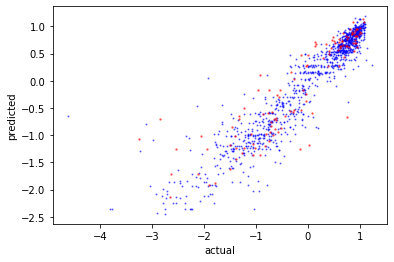

In [10]:
from PredictionUtil import auto_evaluation

train_prediction_y,test_prediction_y=auto_evaluation(model,
                                                     interacted_train_x,
                                                     train_y,
                                                     interacted_test_x,
                                                     test_y,
                                                    )

In [20]:
#find ideal bit
#use blueqat instead of digital annealer
from CompositeAnalyzer import CompositeAnalyzer

composite_anal=CompositeAnalyzer(bit_compressor,qubo_util,
                                auto_bit_converter,
                                data_scaler,
                                list(train_df.columns),
                                target_param)
                                
act_best_x=composite_anal.find_actual_best_x(train_x,train_y)
ideal_bit=composite_anal.find_da_best_x(model)

In [21]:
#calculate similarity with compound database
original_ideal_bit=bit_compressor.inverse_transform([ideal_bit])[0]
composite_anal.set_ideal_bit(original_ideal_bit)
found_comp_dict,best_comp_dict=composite_anal.compare_with_database(compound_database)


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:08<00:00, 11.35s/it]


In [22]:
#explore composite electrolytes

from ScreeningUtility import ScreeningUtility
screener=ScreeningUtility(composite_anal,model)

#three methods available
"""
get_best_condition: find the most similar condition with the best bit
get_random_da_condition: find similar conditions with the best bit, randomly
get_random_condition: just try random conditions
"""
funcs =(
          composite_anal.get_best_condition,
          composite_anal.get_random_da_condition,
          composite_anal.get_random_condition
        )

for f in funcs:
    print("method: ", f)
    condition=f()
    y=screener.predict(condition)
    print("condition: ", condition)
    print("y: ",y)

method:  <bound method CompositeAnalyzer.get_best_condition of <CompositeAnalyzer.CompositeAnalyzer object at 0x000001C99D9BE5C8>>
condition:  [('[Mg]OCC[Mg]', 0.0), ('O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F', 0.743309502501349), ('COCOC', 0.3239426257787082), ('CCC', 0.1729033599714429), ('CCCC(C)(COC(N)=O)COC(N)=O ', 0.0), ('CCCC(C)(COC(N)=O)COC(N)=O ', 4.336808689942018e-19)]
y:  [-0.19959899]
method:  <bound method CompositeAnalyzer.get_random_da_condition of <CompositeAnalyzer.CompositeAnalyzer object at 0x000001C99D9BE5C8>>
condition:  [('O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F', 0.0), ('O=S(C1=CC=C(C=C1)C([Mg])C[Mg])([N-]S(=O)(C(F)(F)F)=O)=O', 0.743309502501349), ('CF', 0.3239426257787082), ('CCN', 0.1729033599714429), ('CCCCCCCCCC#N', 0.0), ('CC(C)(C)CC(CC(=O)[O-])N', 4.336808689942018e-19)]
y:  [-0.38218607]
method:  <bound method CompositeAnalyzer.get_random_condition of <CompositeAnalyzer.CompositeAnalyzer object at 0x000001C99D9BE5C8>>
condition:  [['CCCCCCCCCCCCN1C(=CC=C1C2=

# find best electrolytes!

In [23]:
# find by annealing
import time
for i in range(1):
    file_name="log/da"+str(int(time.time()))+".bin"
    screener=ScreeningUtility(composite_anal,model,log_file_path=file_name)
    da_res,da_hist,x_list=screener.auto_loop(composite_anal.get_random_da_condition,100)
    #screener.save_log()


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 56.24it/s]


In [24]:
# find randomly
for i in range(1):
    file_name="log/random"+str(int(time.time()))+".bin"
    screener=ScreeningUtility(composite_anal,model,log_file_path=file_name)
    rand_res,rand_hist,x_list=screener.auto_loop(composite_anal.get_random_condition,100)
    #screener.save_log()


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.72it/s]


In [25]:
#find by bayes
from BayesOptComposite import BayesOptComposite
smiles_list=list(compound_database.fp_dict.keys())
for i in range(1):
    file_name="log/bayes"+str(int(time.time()))+".bin"
    screener=ScreeningUtility(composite_anal,model,log_file_path=file_name)
    opt_finder=BayesOptComposite(smiles_list,screener)
    opt_res,opt_hist=opt_finder.explore(max_iter=20)
    #screener.save_log()

num acquisition: 1, time elapsed: 1.34s
num acquisition: 2, time elapsed: 2.58s
num acquisition: 3, time elapsed: 3.83s
num acquisition: 4, time elapsed: 5.03s
num acquisition: 5, time elapsed: 6.58s
num acquisition: 6, time elapsed: 8.01s
num acquisition: 7, time elapsed: 9.40s
num acquisition: 8, time elapsed: 10.66s
num acquisition: 9, time elapsed: 11.86s
num acquisition: 10, time elapsed: 13.04s
num acquisition: 11, time elapsed: 14.23s
num acquisition: 12, time elapsed: 15.42s
num acquisition: 13, time elapsed: 16.63s
num acquisition: 14, time elapsed: 17.82s
num acquisition: 15, time elapsed: 19.06s
num acquisition: 16, time elapsed: 20.33s
num acquisition: 17, time elapsed: 21.54s
num acquisition: 18, time elapsed: 22.81s
num acquisition: 19, time elapsed: 24.05s
num acquisition: 20, time elapsed: 25.30s


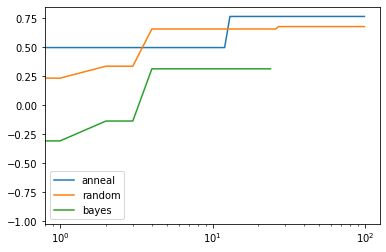

In [26]:
#compare results
import matplotlib.pyplot as plt
plt.plot(da_hist,label="anneal")
plt.plot(rand_hist,label="random")
plt.plot(opt_hist,label="bayes")
plt.xscale('log')
plt.legend()

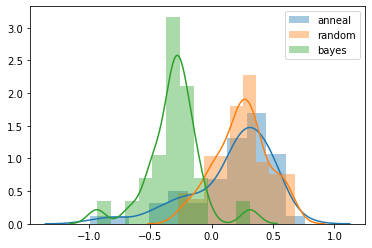

In [27]:
import seaborn as sns
sns.distplot(da_res,label="anneal")
sns.distplot(rand_res,label="random")
sns.distplot(opt_res,label="bayes")
plt.legend()